# Squad Analysis

In-depth exploratory data analysis of your Football Manager squad data.

## Data Overview

Load the processed squad features and explore player characteristics, performance metrics, and tactical insights.

In [27]:
# Setup: imports and load squad data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load squad features
from src.utils.paths import FEATURES_DIR
squad_path = FEATURES_DIR / 'squad_features.parquet'
df = pd.read_parquet(squad_path)

print(f"Squad size: {len(df)} players")
print(f"Features: {len(df.columns)} columns")
df.head()

Squad size: 29 players
Features: 92 columns


,age,mins,av_rat,Player,gl_mst,int_90,pres_c_90,tck_r,tck_90,tcon_90,...,squad_technical__pom,squad_technical__pas__dup1,squad_technical__tck_90,squad_technical__drb_90,squad_technical__shot,squad_technical__yel,squad_technical__red,squad_technical__av_rat,squad_technical__apps,squad_technical__apps_subs
0,19,1920,6.71,Endrick,0,1.31,1.92,0.73,1.50,1.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,24,81,6.65,Reinier,0,2.22,2.22,0.60,3.33,1.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,18,1997,6.68,Lamine Yamal,0,2.25,3.15,0.71,2.79,1.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,22,1036,6.67,Jhon DurÃ¡n,0,1.39,1.91,0.76,2.17,1.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,20,3035,6.83,Omari Kellyman,0,0.92,1.90,0.60,0.89,1.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [22]:
# Data overview and basic info
print("=== COLUMN BREAKDOWN ===")
print(f"Total columns: {len(df.columns)}")
print("\nKey columns:")
for col in df.columns[:15]:
    print(f"  {col}")
if len(df.columns) > 15:
    print(f"  ... and {len(df.columns) - 15} more")

print(f"\n=== BASIC STATS ===")
print(f"Age range: {df['age'].min():.0f} - {df['age'].max():.0f} years")
print(f"Average rating range: {df['av_rat'].min():.2f} - {df['av_rat'].max():.2f}")
print(f"Total apps: {df['apps'].sum():.0f}")
print(f"Total goals: {df['gls'].sum():.0f}")

# Missing data overview
print(f"\n=== MISSING DATA ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(1)
top_missing = missing[missing > 0].head(10)
for col, count in top_missing.items():
    print(f"  {col}: {count} ({missing_pct[col]}%)")
    
df.describe()

=== COLUMN BREAKDOWN ===
Total columns: 35

Key columns:
  age
  apps
  mins
  av_rat
  Player
  gl_mst
  int_90
  pres_c_90
  tck_r
  tck_90
  tcon_90
  k_hdrs
  hdrs_w_90
  cr_c_a
  ch_c_90
  ... and 20 more

=== BASIC STATS ===
Age range: 18 - 29 years
Average rating range: 6.65 - 7.04
Total apps: 170
Total goals: 59

=== MISSING DATA ===
  apps: 22 (75.9%)
  Player: 29 (100.0%)
  int_90: 1 (3.4%)
  pres_c_90: 1 (3.4%)
  tck_90: 1 (3.4%)
  tcon_90: 1 (3.4%)
  hdrs_w_90: 3 (10.3%)
  cr_c_a: 9 (31.0%)
  ch_c_90: 5 (17.2%)
  op_kp_90: 1 (3.4%)


,age,apps,mins,av_rat,Player,gl_mst,int_90,pres_c_90,tck_r,tck_90,...,xg_shot,gls_90,sht_90,shot,ability,potential,det,personality,apps__dup1,apps_subs
count,29.000000,7.000000,29.0000,29.000000,0.0,29.000000,28.000000,28.000000,29.000000,28.000000,...,29.000000,19.000000,24.000000,25.000000,0.0,0.0,29.000000,0.0,29.000000,29.0
mean,20.862069,24.285714,1561.0000,6.811724,NaN,0.241379,1.899643,2.601429,0.726897,2.330714,...,0.102759,0.182632,0.461250,0.406000,NaN,NaN,13.413793,NaN,17.482759,6.068966
std,2.531574,13.174651,890.9432,0.107473,NaN,0.510964,0.907138,1.135194,0.202627,0.982110,...,0.070958,0.154267,0.327312,0.174595,NaN,NaN,2.244314,NaN,11.236486,6.1058
min,18.000000,7.000000,39.0000,6.650000,NaN,0.000000,0.030000,0.000000,0.000000,0.000000,...,0.000000,0.030000,0.000000,0.000000,NaN,NaN,5.000000,NaN,0.000000,0.0
25%,19.000000,13.000000,759.0000,6.710000,NaN,0.000000,1.370000,1.917500,0.690000,1.850000,...,0.050000,0.055000,0.227500,0.330000,NaN,NaN,13.000000,NaN,7.000000,1.0
50%,20.000000,31.000000,1655.0000,6.830000,NaN,0.000000,1.915000,2.975000,0.760000,2.420000,...,0.090000,0.130000,0.395000,0.400000,NaN,NaN,14.000000,NaN,19.000000,4.0
75%,22.000000,34.500000,2070.0000,6.900000,NaN,0.000000,2.427500,3.320000,0.830000,3.037500,...,0.150000,0.255000,0.577500,0.450000,NaN,NaN,15.000000,NaN,26.000000,10.0
max,29.000000,37.000000,3035.0000,7.040000,NaN,2.000000,4.430000,4.240000,1.000000,4.110000,...,0.220000,0.590000,1.240000,1.000000,NaN,NaN,16.000000,NaN,37.000000,21.0


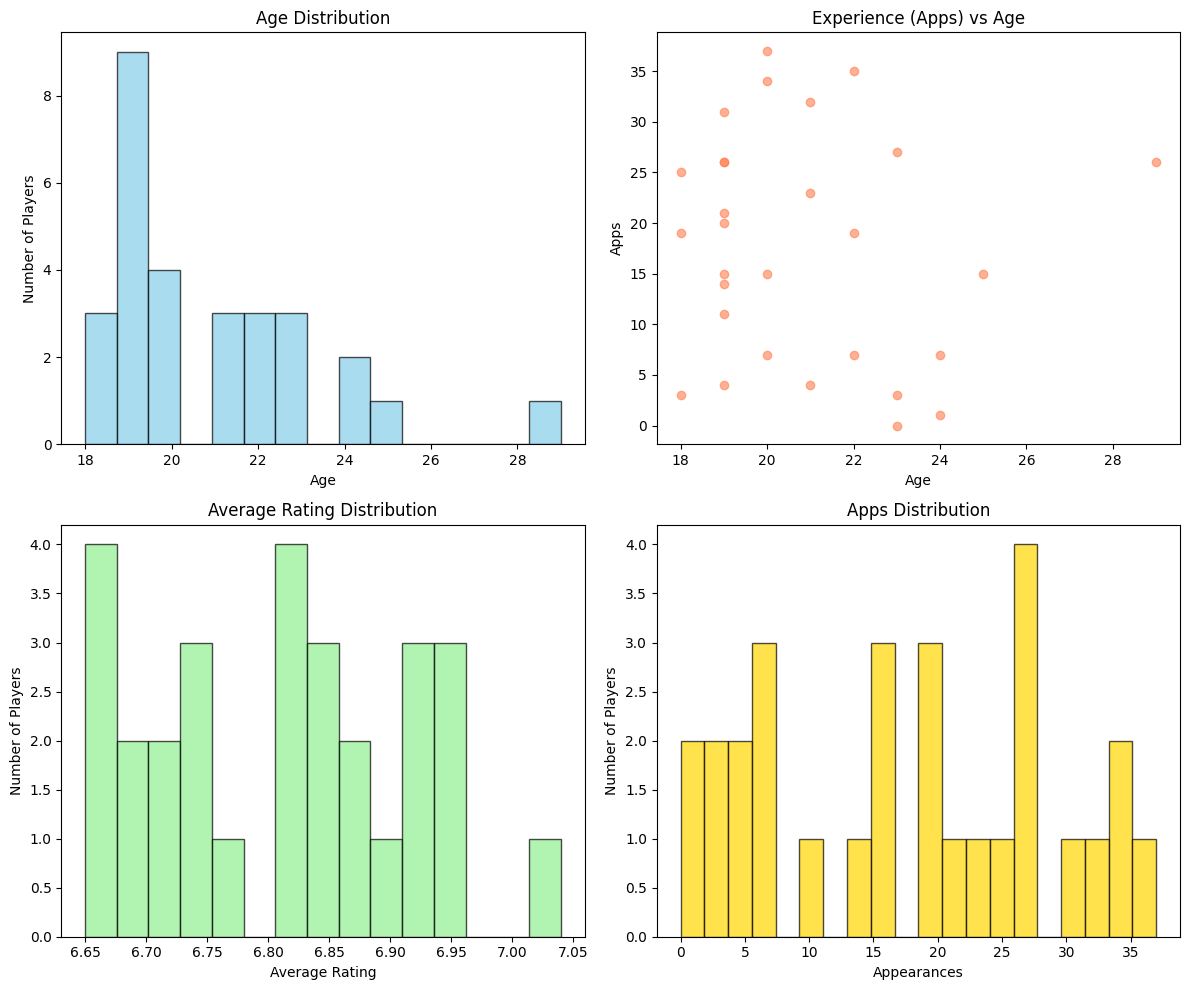

=== MOST EXPERIENCED PLAYERS ===
Omari Kellyman: 37 apps, age 20, rating 6.83
Ronnie Edwards: 35 apps, age 22, rating 6.71
Dennis Seimen: 34 apps, age 20, rating 6.92
JeanuÃ«l Belocian: 32 apps, age 21, rating 6.75
Froilan DÃ­az: 31 apps, age 19, rating 6.86

=== YOUNGEST PLAYERS ===
Lamine Yamal: age 18, 25 apps, rating 6.68
Kendry PÃ¡ez: age 18, 3 apps, rating 7.04
Ethan Nwaneri: age 18, 19 apps, rating 6.95
Endrick: age 19, 26 apps, rating 6.71
Pau CubarsÃ­: age 19, 20 apps, rating 6.84


In [28]:
# Age and Experience Analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age distribution
axes[0,0].hist(df['age'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Number of Players')

# Apps vs Age
axes[0,1].scatter(df['age'], df['apps'], alpha=0.6, color='coral')
axes[0,1].set_title('Experience (Apps) vs Age')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Apps')

# Average Rating distribution
axes[1,0].hist(df['av_rat'], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_title('Average Rating Distribution')
axes[1,0].set_xlabel('Average Rating')
axes[1,0].set_ylabel('Number of Players')

# Apps distribution
axes[1,1].hist(df['apps'], bins=20, alpha=0.7, color='gold', edgecolor='black')
axes[1,1].set_title('Apps Distribution')
axes[1,1].set_xlabel('Appearances')
axes[1,1].set_ylabel('Number of Players')

plt.tight_layout()
plt.show()

# Top experienced players
print("=== MOST EXPERIENCED PLAYERS ===")
top_exp = df.nlargest(5, 'apps')[['Player', 'age', 'apps', 'av_rat']]
for _, player in top_exp.iterrows():
    print(f"{player['Player']}: {player['apps']:.0f} apps, age {player['age']:.0f}, rating {player['av_rat']:.2f}")

print("\n=== YOUNGEST PLAYERS ===")
youngest = df.nsmallest(5, 'age')[['Player', 'age', 'apps', 'av_rat']]
for _, player in youngest.iterrows():
    print(f"{player['Player']}: age {player['age']:.0f}, {player['apps']:.0f} apps, rating {player['av_rat']:.2f}")

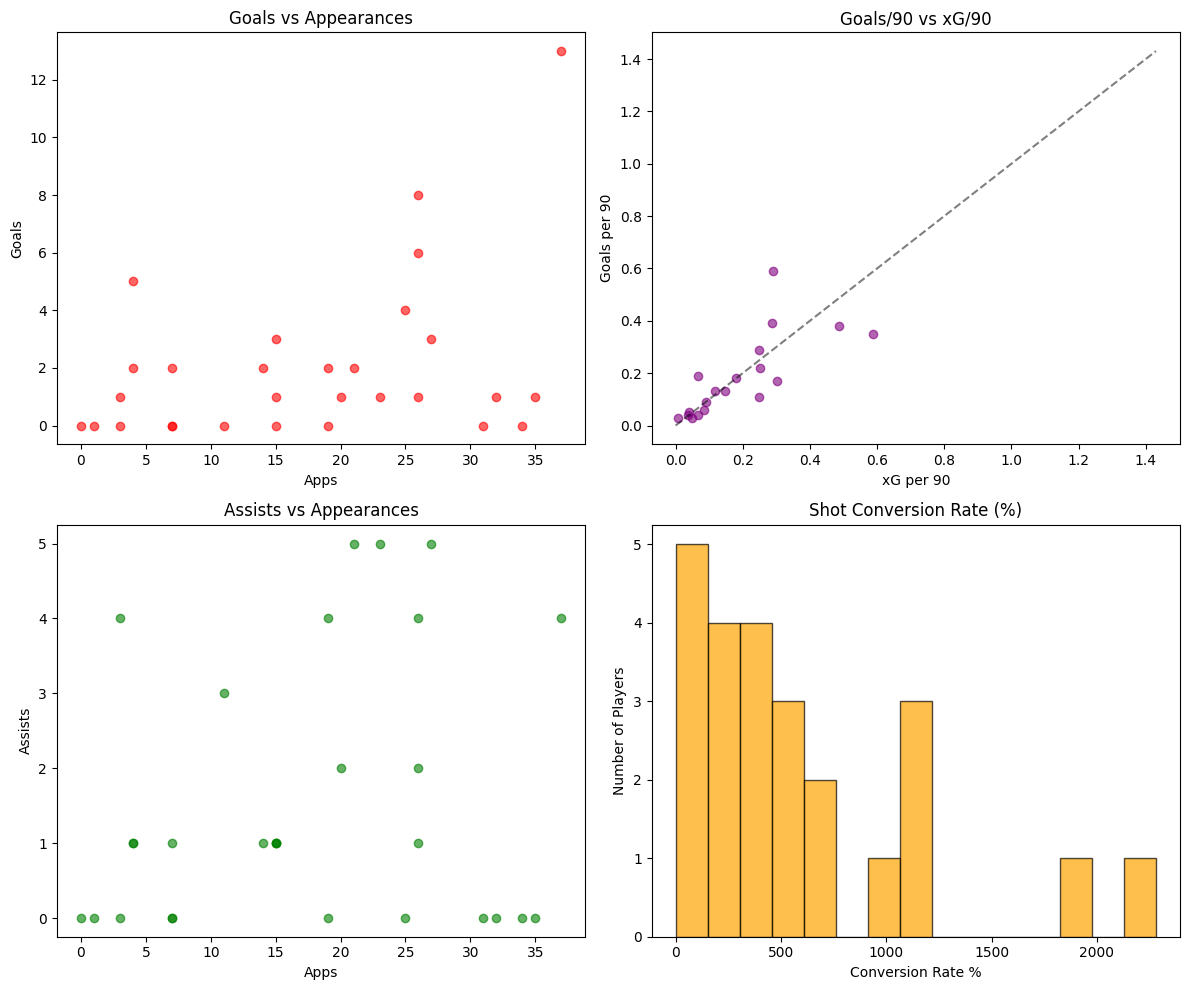

=== TOP SCORERS ===
Omari Kellyman: 13 goals in 37 apps (0.39/90)
Endrick: 8 goals in 26 apps (0.38/90)
Assan OuÃ©draogo: 6 goals in 26 apps (0.29/90)
Callum Marshall: 5 goals in 4 apps (0.59/90)
Lamine Yamal: 4 goals in 25 apps (0.18/90)

=== MOST ASSISTS ===
Liam Gibbs: 5 assists in 27 apps (0.21/90)
Archie Gray: 5 assists in 21 apps (0.23/90)
Reuell Walters: 5 assists in 23 apps (0.23/90)
Omari Kellyman: 4 assists in 37 apps (0.12/90)
Kendry PÃ¡ez: 4 assists in 3 apps (0.86/90)


In [30]:
# Attacking Performance Analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Goals vs Apps
axes[0,0].scatter(df['apps'], df['gls'], alpha=0.6, color='red')
axes[0,0].set_title('Goals vs Appearances')
axes[0,0].set_xlabel('Apps')
axes[0,0].set_ylabel('Goals')

# Goals per 90 vs xG per 90
if 'gls_90' in df.columns and 'xg' in df.columns:
    # Calculate xG per 90 if not present
    if 'xg_90' not in df.columns:
        df['xg_90'] = (df['xg'] / df['mins'] * 90).fillna(0)
    
    axes[0,1].scatter(df['xg_90'], df['gls_90'], alpha=0.6, color='purple')
    axes[0,1].plot([0, df['xg_90'].max()], [0, df['xg_90'].max()], 'k--', alpha=0.5)
    axes[0,1].set_title('Goals/90 vs xG/90')
    axes[0,1].set_xlabel('xG per 90')
    axes[0,1].set_ylabel('Goals per 90')

# Assists analysis
if 'ast' in df.columns:
    axes[1,0].scatter(df['apps'], df['ast'], alpha=0.6, color='green')
    axes[1,0].set_title('Assists vs Appearances')
    axes[1,0].set_xlabel('Apps')
    axes[1,0].set_ylabel('Assists')

# Shot efficiency
if 'shot' in df.columns and 'gls' in df.columns:
    # Calculate shot conversion rate (avoid division by zero)
    shot_rate = df['gls'] / df['shot'].replace(0, np.nan) * 100
    axes[1,1].hist(shot_rate.dropna(), bins=15, alpha=0.7, color='orange', edgecolor='black')
    axes[1,1].set_title('Shot Conversion Rate (%)')
    axes[1,1].set_xlabel('Conversion Rate %')
    axes[1,1].set_ylabel('Number of Players')

plt.tight_layout()
plt.show()

# Top scorers
print("=== TOP SCORERS ===")
top_scorers = df.nlargest(5, 'gls')[['Player', 'gls', 'apps', 'gls_90', 'xg']]
for _, player in top_scorers.iterrows():
    print(f"{player['Player']}: {player['gls']:.0f} goals in {player['apps']:.0f} apps ({player['gls_90']:.2f}/90)")

# Most creative players
if 'ast' in df.columns:
    print("\n=== MOST ASSISTS ===")
    top_assists = df.nlargest(5, 'ast')[['Player', 'ast', 'apps', 'asts_90']]
    for _, player in top_assists.iterrows():
        print(f"{player['Player']}: {player['ast']:.0f} assists in {player['apps']:.0f} apps ({player['asts_90']:.2f}/90)")

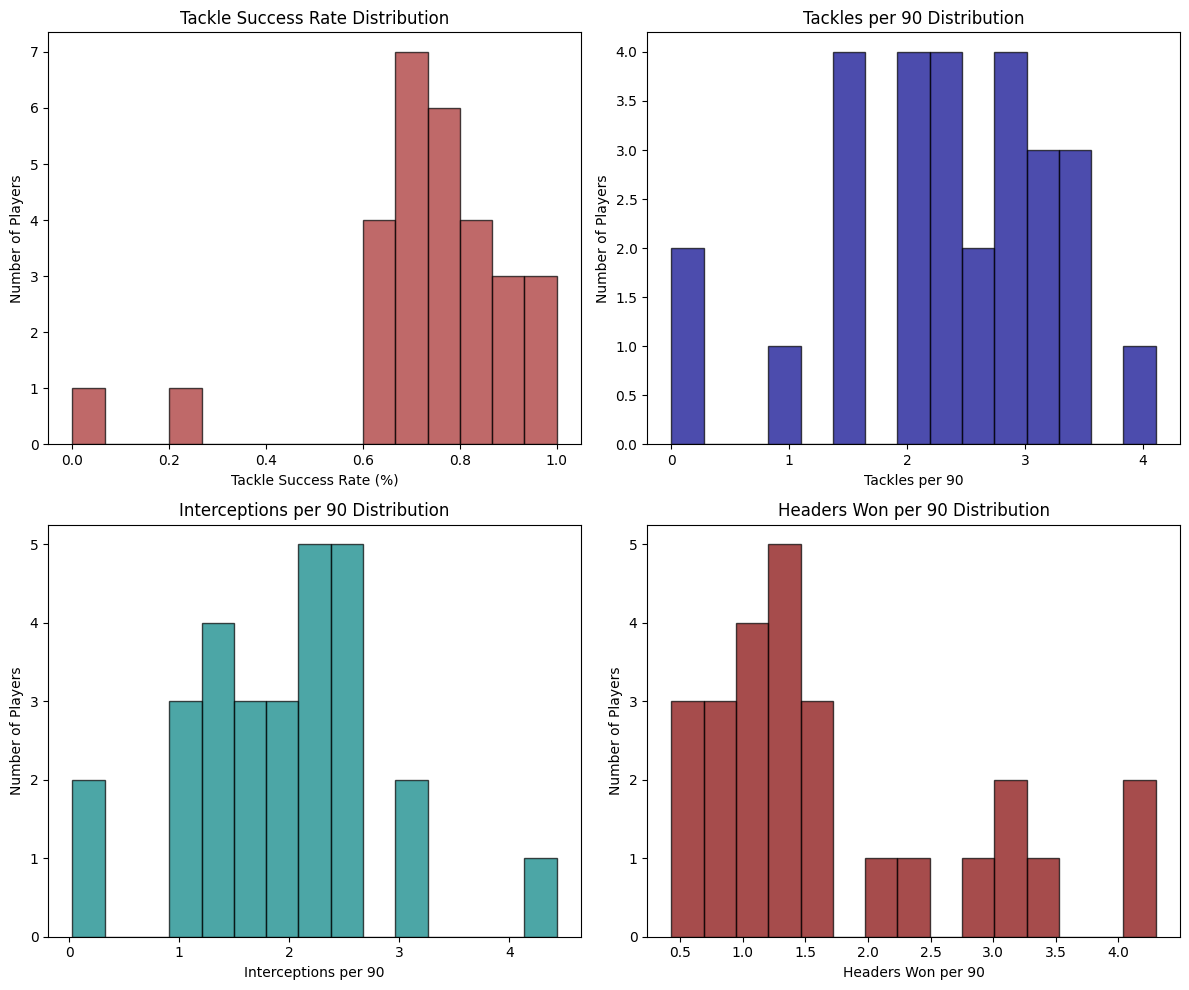

=== TOP DEFENSIVE PLAYERS ===
JuliÃ¡n Araujo: tck: 3.3, int: 4.4, hdrs_w: 1.3 (score: 9.0)
Reuell Walters: tck: 3.1, int: 3.1, hdrs_w: 2.0 (score: 8.2)
Jayden Meghoma: tck: 3.5, int: 3.1, hdrs_w: 1.6 (score: 8.2)
Bastien Meupiyou: tck: 1.9, int: 1.9, hdrs_w: 4.1 (score: 8.0)
Pau CubarsÃ­: tck: 2.1, int: 2.5, hdrs_w: 3.4 (score: 8.0)


In [31]:
# Defensive & Physical Analysis
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Tackle success rate
if 'tck_r' in df.columns:
    # Convert percentage string to numeric if needed
    tck_rate = df['tck_r']
    if tck_rate.dtype == 'object':
        tck_rate = pd.to_numeric(tck_rate.str.replace('%', ''), errors='coerce')
    
    axes[0,0].hist(tck_rate.dropna(), bins=15, alpha=0.7, color='brown', edgecolor='black')
    axes[0,0].set_title('Tackle Success Rate Distribution')
    axes[0,0].set_xlabel('Tackle Success Rate (%)')
    axes[0,0].set_ylabel('Number of Players')

# Tackles per 90
if 'tck_90' in df.columns:
    axes[0,1].hist(df['tck_90'].dropna(), bins=15, alpha=0.7, color='darkblue', edgecolor='black')
    axes[0,1].set_title('Tackles per 90 Distribution')
    axes[0,1].set_xlabel('Tackles per 90')
    axes[0,1].set_ylabel('Number of Players')

# Interceptions per 90
if 'int_90' in df.columns:
    axes[1,0].hist(df['int_90'].dropna(), bins=15, alpha=0.7, color='teal', edgecolor='black')
    axes[1,0].set_title('Interceptions per 90 Distribution')
    axes[1,0].set_xlabel('Interceptions per 90')
    axes[1,0].set_ylabel('Number of Players')

# Headers won per 90
if 'hdrs_w_90' in df.columns:
    axes[1,1].hist(df['hdrs_w_90'].dropna(), bins=15, alpha=0.7, color='maroon', edgecolor='black')
    axes[1,1].set_title('Headers Won per 90 Distribution')
    axes[1,1].set_xlabel('Headers Won per 90')
    axes[1,1].set_ylabel('Number of Players')

plt.tight_layout()
plt.show()

# Top defensive players
defensive_cols = ['tck_90', 'int_90', 'hdrs_w_90']
available_def_cols = [col for col in defensive_cols if col in df.columns]

if available_def_cols:
    print("=== TOP DEFENSIVE PLAYERS ===")
    # Create a simple defensive score
    def_score = df[available_def_cols].fillna(0).sum(axis=1)
    df_with_def = df.copy()
    df_with_def['def_score'] = def_score
    
    top_defenders = df_with_def.nlargest(5, 'def_score')[['Player', 'apps'] + available_def_cols + ['def_score']]
    for _, player in top_defenders.iterrows():
        metrics = ', '.join([f"{col.replace('_90', '')}: {player[col]:.1f}" for col in available_def_cols])
        print(f"{player['Player']}: {metrics} (score: {player['def_score']:.1f})")

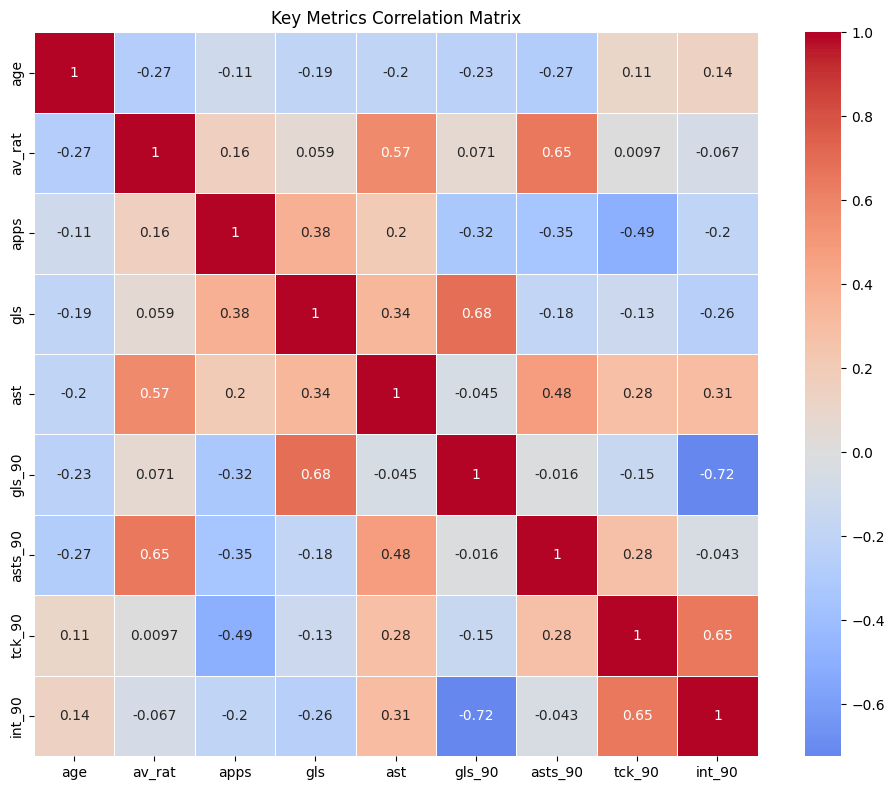

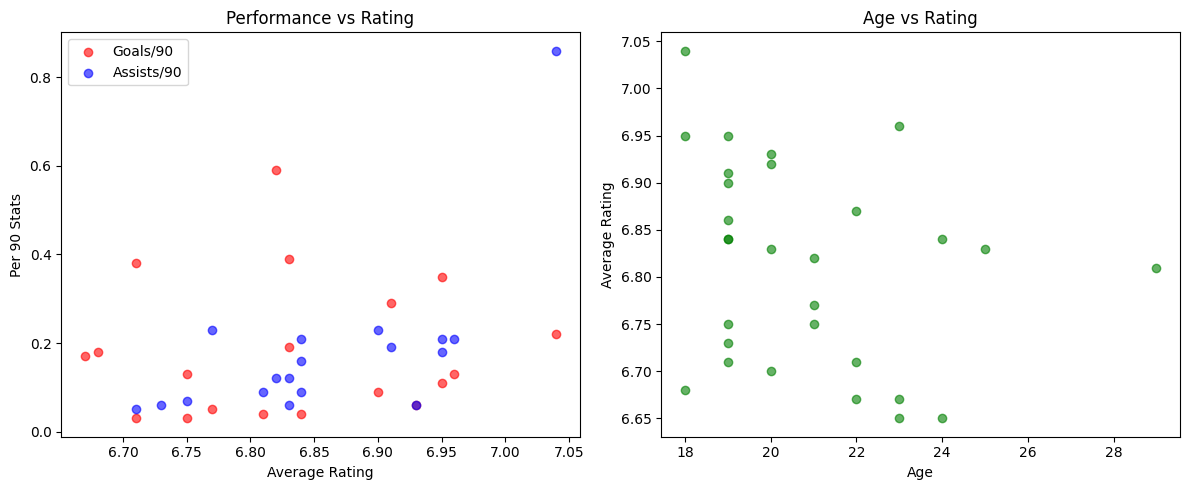

=== PLAYER ARCHETYPES ===

Goal Scorers (top 20% by goals/90): 4 players
  Callum Marshall: 0.59 goals/90, rating 6.82
  Omari Kellyman: 0.39 goals/90, rating 6.83
  Endrick: 0.38 goals/90, rating 6.71

Playmakers (top 20% by assists/90): 3 players
  Kendry PÃ¡ez: 0.86 assists/90, rating 7.04
  Archie Gray: 0.23 assists/90, rating 6.90
  Reuell Walters: 0.23 assists/90, rating 6.77

Workhorses (high apps + good rating): 4 players
  Dennis Seimen: 34 apps, rating 6.92
  Froilan DÃ­az: 31 apps, rating 6.86
  Liam Gibbs: 27 apps, rating 6.96


In [32]:
# Correlation Analysis & Player Comparison
# Select key numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
key_metrics = [col for col in ['age', 'av_rat', 'apps', 'gls', 'ast', 'gls_90', 'asts_90', 'tck_90', 'int_90'] 
               if col in numeric_cols]

if len(key_metrics) > 3:
    # Correlation matrix
    plt.figure(figsize=(10, 8))
    corr_matrix = df[key_metrics].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5)
    plt.title('Key Metrics Correlation Matrix')
    plt.tight_layout()
    plt.show()

# Performance vs Rating analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['av_rat'], df['gls_90'], alpha=0.6, color='red', label='Goals/90')
if 'asts_90' in df.columns:
    plt.scatter(df['av_rat'], df['asts_90'], alpha=0.6, color='blue', label='Assists/90')
plt.xlabel('Average Rating')
plt.ylabel('Per 90 Stats')
plt.title('Performance vs Rating')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(df['age'], df['av_rat'], alpha=0.6, color='green')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.title('Age vs Rating')

plt.tight_layout()
plt.show()

# Player archetypes based on performance
print("=== PLAYER ARCHETYPES ===")

# Goal scorers (high goals/90)
if 'gls_90' in df.columns:
    goal_scorers = df[df['gls_90'] > df['gls_90'].quantile(0.8)]
    print(f"\nGoal Scorers (top 20% by goals/90): {len(goal_scorers)} players")
    for _, p in goal_scorers.nlargest(3, 'gls_90')[['Player', 'gls_90', 'av_rat']].iterrows():
        print(f"  {p['Player']}: {p['gls_90']:.2f} goals/90, rating {p['av_rat']:.2f}")

# Playmakers (high assists/90 or key passes)
if 'asts_90' in df.columns:
    playmakers = df[df['asts_90'] > df['asts_90'].quantile(0.8)]
    print(f"\nPlaymakers (top 20% by assists/90): {len(playmakers)} players")
    for _, p in playmakers.nlargest(3, 'asts_90')[['Player', 'asts_90', 'av_rat']].iterrows():
        print(f"  {p['Player']}: {p['asts_90']:.2f} assists/90, rating {p['av_rat']:.2f}")

# Workhorses (high apps, consistent rating)
workhorses = df[(df['apps'] > df['apps'].quantile(0.7)) & 
                (df['av_rat'] > df['av_rat'].median())]
print(f"\nWorkhorses (high apps + good rating): {len(workhorses)} players")
for _, p in workhorses.nlargest(3, 'apps')[['Player', 'apps', 'av_rat']].iterrows():
    print(f"  {p['Player']}: {p['apps']:.0f} apps, rating {p['av_rat']:.2f}")

=== TACTICAL ANALYSIS ===

Squad Usage Distribution:
  Regular starters (>20 apps): 12
  Squad players (10-20 apps): 8
  Fringe players (<10 apps): 9

Performance Tiers:
  High performers (≥7.0): 1 players
  Consistent (6.5-6.99): 28 players
  Inconsistent (<6.5): 0 players

Age Profile:
  Young prospects (<23): 22 players
  Prime age (23-28): 6 players
  Veterans (>28): 1 players


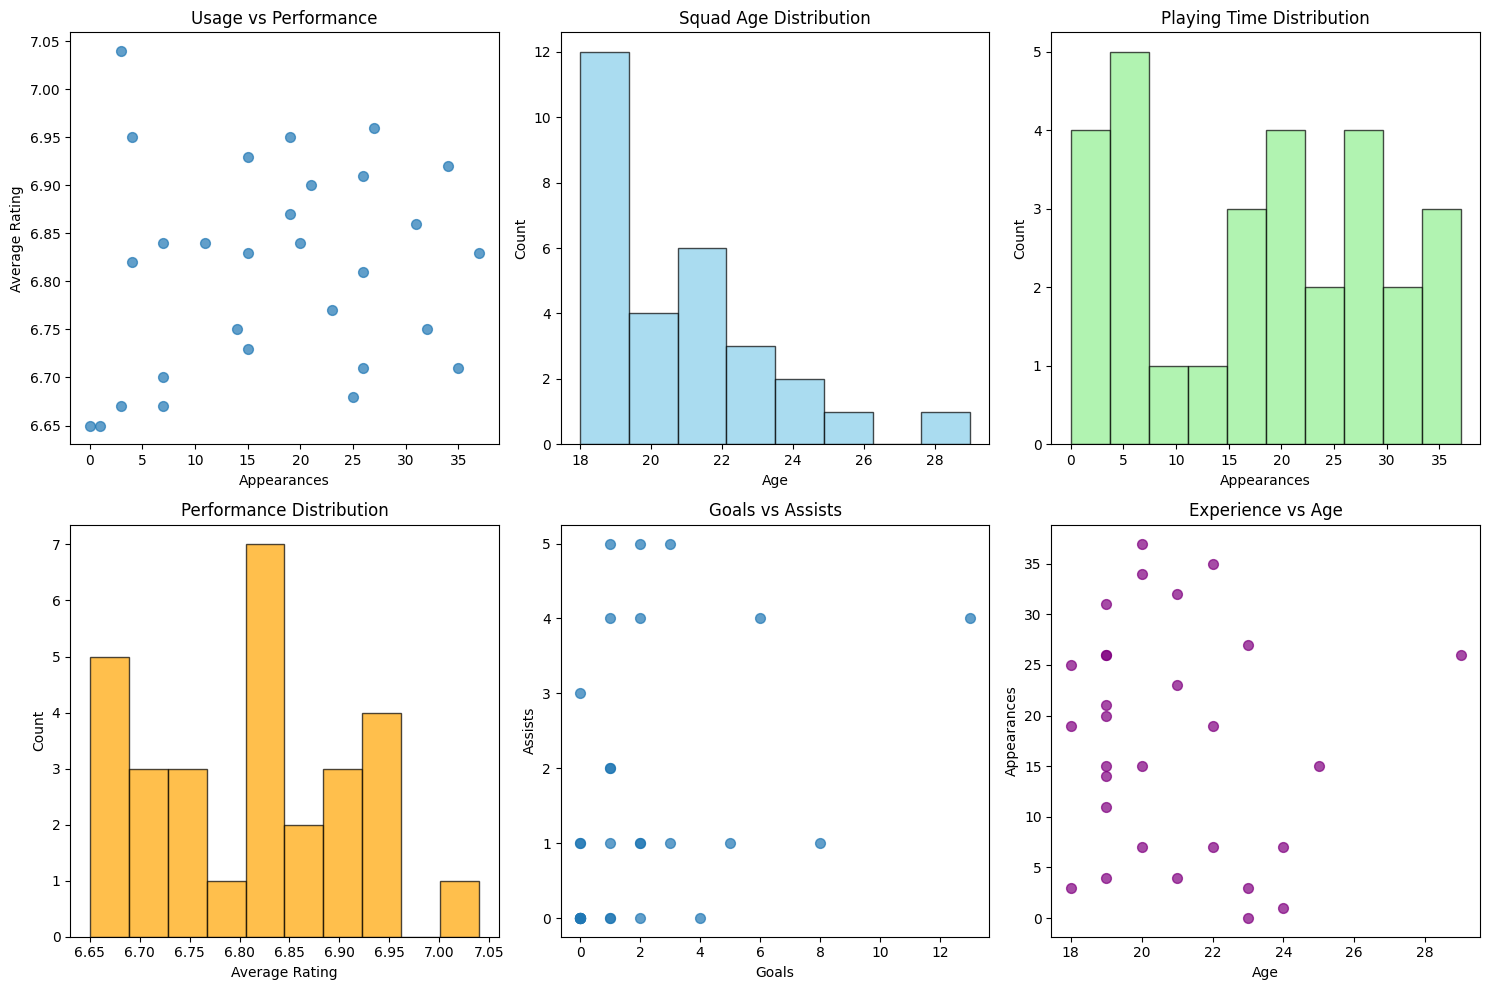

In [33]:
# Tactical Analysis & Squad Assessment
print("=== TACTICAL ANALYSIS ===")

# Squad depth analysis by apps
apps_distribution = df['apps'].describe()
print(f"\nSquad Usage Distribution:")
print(f"  Regular starters (>20 apps): {len(df[df['apps'] > 20])}")
print(f"  Squad players (10-20 apps): {len(df[(df['apps'] >= 10) & (df['apps'] <= 20)])}")
print(f"  Fringe players (<10 apps): {len(df[df['apps'] < 10])}")

# Rating consistency
if 'av_rat' in df.columns:
    high_performers = df[df['av_rat'] >= 7.0]
    consistent_performers = df[(df['av_rat'] >= 6.5) & (df['av_rat'] < 7.0)]
    inconsistent = df[df['av_rat'] < 6.5]
    
    print(f"\nPerformance Tiers:")
    print(f"  High performers (≥7.0): {len(high_performers)} players")
    print(f"  Consistent (6.5-6.99): {len(consistent_performers)} players")
    print(f"  Inconsistent (<6.5): {len(inconsistent)} players")

# Age profile and succession planning
young_players = df[df['age'] < 23]
prime_players = df[(df['age'] >= 23) & (df['age'] <= 28)]
veteran_players = df[df['age'] > 28]

print(f"\nAge Profile:")
print(f"  Young prospects (<23): {len(young_players)} players")
print(f"  Prime age (23-28): {len(prime_players)} players")
print(f"  Veterans (>28): {len(veteran_players)} players")

# Key insights
plt.figure(figsize=(15, 10))

# Apps vs Rating scatter
plt.subplot(2, 3, 1)
plt.scatter(df['apps'], df['av_rat'], alpha=0.7, s=50)
plt.xlabel('Appearances')
plt.ylabel('Average Rating')
plt.title('Usage vs Performance')

# Age distribution
plt.subplot(2, 3, 2)
plt.hist(df['age'], bins=8, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Squad Age Distribution')

# Apps distribution
plt.subplot(2, 3, 3)
plt.hist(df['apps'], bins=10, alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel('Appearances')
plt.ylabel('Count')
plt.title('Playing Time Distribution')

# Performance distribution
plt.subplot(2, 3, 4)
plt.hist(df['av_rat'], bins=10, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.title('Performance Distribution')

# Goals vs Assists (if available)
plt.subplot(2, 3, 5)
if 'gls' in df.columns and 'ast' in df.columns:
    plt.scatter(df['gls'], df['ast'], alpha=0.7, s=50)
    plt.xlabel('Goals')
    plt.ylabel('Assists')
    plt.title('Goals vs Assists')
else:
    plt.text(0.5, 0.5, 'Goals/Assists data\nnot available', 
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Goals vs Assists (N/A)')

# Experience (apps) vs Age
plt.subplot(2, 3, 6)
plt.scatter(df['age'], df['apps'], alpha=0.7, s=50, color='purple')
plt.xlabel('Age')
plt.ylabel('Appearances')
plt.title('Experience vs Age')

plt.tight_layout()
plt.show()

In [34]:
# Squad Recommendations & Key Insights
print("=" * 60)
print("SQUAD ANALYSIS SUMMARY & RECOMMENDATIONS")
print("=" * 60)

# Top performers
print("\n🌟 TOP PERFORMERS:")
top_performers = df.nlargest(5, 'av_rat')[['Player', 'age', 'av_rat', 'apps']]
for i, (_, player) in enumerate(top_performers.iterrows(), 1):
    print(f"{i}. {player['Player']} (Age {player['age']:.0f}) - Rating: {player['av_rat']:.2f}, Apps: {player['apps']:.0f}")

# Most used players
print("\n⚽ MOST USED PLAYERS:")
most_used = df.nlargest(5, 'apps')[['Player', 'age', 'av_rat', 'apps']]
for i, (_, player) in enumerate(most_used.iterrows(), 1):
    print(f"{i}. {player['Player']} (Age {player['age']:.0f}) - Apps: {player['apps']:.0f}, Rating: {player['av_rat']:.2f}")

# Goal threats
if 'gls' in df.columns:
    print("\n🥅 TOP GOAL SCORERS:")
    goal_scorers = df[df['gls'] > 0].nlargest(5, 'gls')[['Player', 'age', 'gls', 'av_rat']]
    for i, (_, player) in enumerate(goal_scorers.iterrows(), 1):
        print(f"{i}. {player['Player']} (Age {player['age']:.0f}) - Goals: {player['gls']:.0f}, Rating: {player['av_rat']:.2f}")

# Young prospects
young_talents = df[df['age'] < 23].nlargest(3, 'av_rat')[['Player', 'age', 'av_rat', 'apps']]
if len(young_talents) > 0:
    print("\n🌱 YOUNG PROSPECTS:")
    for i, (_, player) in enumerate(young_talents.iterrows(), 1):
        print(f"{i}. {player['Player']} (Age {player['age']:.0f}) - Rating: {player['av_rat']:.2f}, Apps: {player['apps']:.0f}")

# Squad insights
avg_age = df['age'].mean()
avg_rating = df['av_rat'].mean()
total_apps = df['apps'].sum()

print(f"\n📊 SQUAD METRICS:")
print(f"   Squad Size: {len(df)} players")
print(f"   Average Age: {avg_age:.1f} years")
print(f"   Average Rating: {avg_rating:.2f}")
print(f"   Total Appearances: {total_apps:.0f}")

# Recommendations
print("\n💡 RECOMMENDATIONS:")

# Age-based recommendations
if avg_age > 27:
    print("   • Squad trending older - consider youth recruitment")
elif avg_age < 24:
    print("   • Young squad - may need experienced leadership")
else:
    print("   • Good age balance in squad")

# Performance recommendations
underperformers = df[df['av_rat'] < 6.0]
if len(underperformers) > 0:
    print(f"   • {len(underperformers)} players underperforming (rating <6.0) - consider squad changes")

# Usage recommendations
unused_players = df[df['apps'] < 5]
if len(unused_players) > 0:
    print(f"   • {len(unused_players)} players barely used - loan/sell candidates")

overused_players = df[df['apps'] > 35]
if len(overused_players) > 0:
    print(f"   • {len(overused_players)} players heavily used - risk of fatigue/injury")

# Final summary
print(f"\n🎯 SQUAD STRENGTH ASSESSMENT:")
high_rated = len(df[df['av_rat'] >= 7.0])
decent_rated = len(df[(df['av_rat'] >= 6.5) & (df['av_rat'] < 7.0)])
poor_rated = len(df[df['av_rat'] < 6.5])

print(f"   Strong Players (≥7.0): {high_rated} ({high_rated/len(df)*100:.1f}%)")
print(f"   Decent Players (6.5-6.99): {decent_rated} ({decent_rated/len(df)*100:.1f}%)")
print(f"   Weak Players (<6.5): {poor_rated} ({poor_rated/len(df)*100:.1f}%)")

if high_rated/len(df) > 0.3:
    print("   ✅ Strong squad with good quality depth")
elif high_rated/len(df) > 0.15:
    print("   ⚠️ Decent squad but room for improvement")
else:
    print("   ❌ Squad needs significant strengthening")

print("\n" + "=" * 60)

SQUAD ANALYSIS SUMMARY & RECOMMENDATIONS

🌟 TOP PERFORMERS:
1. Kendry PÃ¡ez (Age 18) - Rating: 7.04, Apps: 3
2. Liam Gibbs (Age 23) - Rating: 6.96, Apps: 27
3. Noah Darvich (Age 19) - Rating: 6.95, Apps: 4
4. Ethan Nwaneri (Age 18) - Rating: 6.95, Apps: 19
5. Yunus Emre Konak (Age 20) - Rating: 6.93, Apps: 15

⚽ MOST USED PLAYERS:
1. Omari Kellyman (Age 20) - Apps: 37, Rating: 6.83
2. Ronnie Edwards (Age 22) - Apps: 35, Rating: 6.71
3. Dennis Seimen (Age 20) - Apps: 34, Rating: 6.92
4. JeanuÃ«l Belocian (Age 21) - Apps: 32, Rating: 6.75
5. Froilan DÃ­az (Age 19) - Apps: 31, Rating: 6.86

🥅 TOP GOAL SCORERS:
1. Omari Kellyman (Age 20) - Goals: 13, Rating: 6.83
2. Endrick (Age 19) - Goals: 8, Rating: 6.71
3. Assan OuÃ©draogo (Age 19) - Goals: 6, Rating: 6.91
4. Callum Marshall (Age 21) - Goals: 5, Rating: 6.82
5. Lamine Yamal (Age 18) - Goals: 4, Rating: 6.68

🌱 YOUNG PROSPECTS:
1. Kendry PÃ¡ez (Age 18) - Rating: 7.04, Apps: 3
2. Noah Darvich (Age 19) - Rating: 6.95, Apps: 4
3. Ethan Nwa